#  Лабораторная работа №5 
# Численное решение системы линейных уравнений и численное интегрирование.

## Выполнил: Понур Кирилл
## Вариант 2
# Задание 1.
В данной работе будут использованы:
* Метод прогонки
* Метод релаксации
* Формула Буля

# Задание 2.
Вычислить определенный интеграл с относительной точностью $\varepsilon=0.01$.
\begin{equation}
   I= -\int\limits_0^{\infty}\cos{2t}\exp\{-i^2t^2-t^2\} dt, i=\overline{2,n-1}
\end{equation}
с помощью формулы Буля
$$
    \sum_{k=0}^4 C_k^{(4)}f(x_k^{(4)})= \\
    =\frac{\beta-\alpha}{90}
    \left( 7f(\alpha)+32f(\frac{3\alpha+\beta}{4})+12f(\frac{\alpha+\beta}{2})+
    32f(\frac{\alpha+3\beta}{4})+7f(\beta)
    \right)
$$

In [1]:
%autosave 300

Autosaving every 300 seconds


In [2]:
from matplotlib.pylab import*
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display,clear_output
import time
import csv
m=4
epsilon=10**(-m)
def boole(a,b,i):
    boole=(
        (b-a)/90*
            (    
             7*f(a,i)+32*f((3*a+b)/4,i)
             +12*f((a+b)/2,i)+
             32*f((a+3*b)/4,i)+
             7*f(b,i)    
             )
          )
    return boole

def integral(a,b,i):
    n=1
    integral=1
    tmp=2
    while abs(integral-tmp)>epsilon:
        h=1/n
        tmp=integral
        integral=0
        for j in range(n):
            tmp1=boole(a+j*h,a+(j+1)*h,i)
            integral+=tmp1
            if abs(tmp1-integral)<epsilon:
                continue
            
        n*=2
    return round(integral,m)

# Задание 3
Для любого заданного $i$ построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации используемого метода численного интегрирования.

0.1418


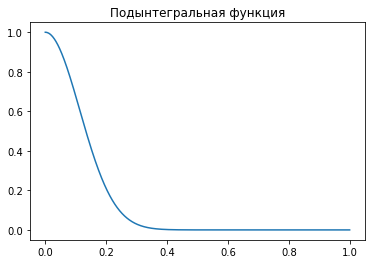

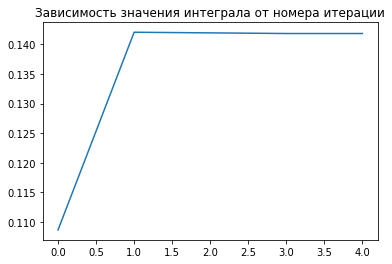

In [3]:
def f(t,i):
    f=np.cos(2*t)*np.exp(-i**2*t**2-t**2)
    return(f)

def integral_demo(a,b,i):
    n=1
    integral=1
    tmp=2
    tmp2=[]
    while abs(integral-tmp)>epsilon:
        h=1/n
        tmp=integral
        integral=0
        for j in range(n):
            tmp1=boole(a+j*h,a+(j+1)*h,i)
            integral+=tmp1
            if abs(tmp1-integral)<epsilon:
                continue
        tmp2.append(integral)    
        n*=2
    return tmp2

a=0
b=1
i=6
print(integral(a,b,i))
t=np.linspace(a,b,1000)
plot(t,f(t,i))
title('Подынтегральная функция')
show()
plot(integral_demo(a,b,i))
title('Зависимость значения интеграла от номера итерации')
show()

# Задание 4
Построить график зависимости свободных членов системы от $i$

In [4]:
class matrix:
    def A(n):
        f = IntProgress(min=0, max=n)
        display(f,'calculate A')
        
        A=np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                if i==j:
                    A[i][j]=-(i**3+3)
                if i+1==j:
                    A[i][j]=(i**2+1)
                if i==j+1:
                    A[i][j]=1
            f.value+=10
        A[0][0]=1
        A[-1][-1]=1
        A[0][1]=-0.5
        A[-1][-2]=0
        clear_output()
        return A

    def D(n):
#         A=matrix.A(n)
        D=np.zeros((n,n))
        f = IntProgress(min=0, max=n)
        display(f,'calculate D')
        for i in range(n):
            for j in range(n):
                if i==j:
                    D[i][j]=A[i][j]
            f.value+=10
        clear_output()
        return D

    def R(n):
        R=np.zeros((n,n))
        f = IntProgress(min=0, max=n)
        display(f,'calculate R')
        for i in range(n):
            for j in range(n):
                if i+1==j:
                    R[i][j]=A[i][j]
            f.value+=10
        clear_output()
        return R

    def L(n):
        L=np.zeros((n,n))
        f = IntProgress(min=0, max=n)
        display(f,'calculate L')
        for i in range(n):
            for j in range(n):
                if i==j+1:
                    L[i][j]=A[i][j]
            f.value+=10
        clear_output()
        return L
    def diagonals(n):
        A=matrix.A(n)
        f = IntProgress(min=0, max=3)
        display(f,'calculate tridiagonal matrix')
        c=[A[i][j] for i in range(n) for j in range(n) if i+1==j]
        f.value+=1
        time.sleep(1)
        d=[A[i][j] for i in range(n) for j in range(n) if i==j]
        f.value+=1
        time.sleep(1)
        a=[A[i][j] for i in range(n) for j in range(n) if i==j+1]
        time.sleep(1)

        f.value+=1
        clear_output()
        return c,d,a

    def b(n):   
        try:
            lines=0
            file=open('integral.tsv','r')
            for line in file:
                lines+=1
            if lines<n:
                file.close()
                raise        
        except:
            w = IntProgress(min=0, max=n)
            display(w,'write to integral.tsv')
            file=open('integral.tsv','w')
            file.write('0'+'\n')
            for i in range(1,n-1):
                w.value+=50
                file.write(str(integral(0,1,i))+'\n')
            file.write('4')
            file.close()

        b=[]
        j=0
        file=open('integral.tsv','r')
        f = IntProgress(min=0, max=n)
        display(f,'import b from file')
        b=np.zeros((n,1))
        b=np.array(b,dtype='float16')
        with file as tsv:
            reader= csv.reader(tsv)
            for i in reader:
                if j>=n:
                    break
                b[j]=(float(i[0]))
                j+=1
                f.value+=50
        b[-1]=4
        file.close()
        print('Done')
        return b

IntProgress(value=0)

'write to integral.tsv'

IntProgress(value=0)

'import b from file'

Done


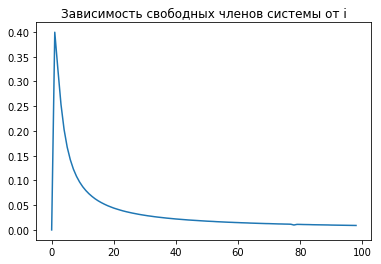

In [ ]:
y=matrix.b(100)
y=y[0:-1]
x=np.arange(len(y))
plot(x,y)
title('Зависимость свободных членов системы от i')
show()


## Итерационные методы решения СЛАУ
Решаем систему
$$Ax=b \tag{*} \label{eq:2}$$ 
Итерационными методами называются приближенные методы, в которых решение системы получается как предел последовательности векторов $\{x^k\}_{k=0}^{\infty}$, каждый последующий элемент которой вычисляется по некоторому единому правилу. Начальный элемент $x^1$ выбирается произвольно.
Последовательность $\{x^k\}_{k=0}^{\infty}$ называется итерационной, а её элементы последовательными итерациями (приближениями).

Важной характеристикой итерационного процесса является скорость схожимости итерационной последовательности. Говорят, что итерация $x^k$ является с точностью $\varepsilon$ приближенным решением системы, если
$$||x^k-x^0||<\varepsilon,$$
где $x^0$- точное решение системы.

Как правило, для итерационного метода решения системы существует такая последовательность невырожденных матриц $H_k$, $k=1,2\dots$, что правило построения элементов итерационной последовательности записывается в виде:
\begin{equation}
    x^{k+1}=x^k-H_k(Ax^k-b)  \label{eq:1} \tag{1}
\end{equation}

Запишем ($\ref{eq:1}$) в виде:
$$x^{k+1}=T_kx^k+H_kb$$,
где $T_k=E-H_kE$, E- единичная ($n\cdot n$)- матрица. Вектор $\varphi^k=x^k-x^0$ называется вектором ошибки, а вектор $r^k=Ax^k=b$ - вектором невязки.

Итерационный метод называется стационарным, если матрица $H_k$ не зависит от номера шага k.  В противном случае метод называется нестационарным. Для того, чтобы стационарный итерационный процесс
$$x^{k+1}=Tx^k+Hb$$, сходился, достаточно, чтобы ля какой-либо одной нормы матрицы $T$ выполнялось неравенство
$$||T||<1.$$

Критерием окончания итерационного процесса при заданной точности $\varepsilon$ может служить неравенство 
$$||x^k-x^{k-1}||\leq\varepsilon\frac{1-||T||}{||T||}$$

## Метод последовательной релаксации

Здесь 
$$H_k= \tau(D+\tau L)^{-1}, T_k=(D+\tau L)^{-1}((1-\tau)D-\tau R)$$

$D$-диагональная матрица, $L$-нижняя треугольная матрица с нулевыми диагональными элементами, $R$-верхняя треугольная матрица с нулевыми диагональными элементами, $0<\tau<2$


# Прямые методы
Прямыми методами решения алгебраических систем называют методы, использующие конечное, известное заранее число арифметических операций. При этом точность решения определяется лишь тольчностью арифметических вычислений. Основной идеей прямых методов, в конечном итоге, является идея исключение неизвестных.
## Метод прогонки

Важным классом систем ($\ref{eq:2}$) являются системы вида:
$$\begin{cases}
d_1 x_1+c_1 x_2= b_1, \\
a_ix_{i-1}+d_ix_i+c_ix_{i+1}=b_i,  & i=2,3\dots,n-1 \\
a_nx_{n-1}+d_nx_n=b_n 
\end{cases} \tag{2} \label{eq:3}$$
с трехдиагональной матрицей
\begin{equation}
A=
    \begin{pmatrix}
    d_1   & c_1   & 0     & 0     & \dots & \dots   &   0      &   0    \\
    a_2   & d_2   & c_2   & 0     & \dots & \dots   &   0      &   0    \\
    \dots & \dots & \dots & \dots & \dots & \dots   & \dots    & \dots  \\
    0     &   0   & \dots & \dots & 0     & a_{n-1} &  d_{n-1} & c_{n-1}\\
    0     &   0   & \dots & \dots & 0     & 0       &  a_{n}   & d_{n}  \\
    \end{pmatrix}
\end{equation}
Такие системы возникают при решении краевых задач для дифференциальных уравнений разностными методами.

Специальный вид матрицы $A$ позволяет применить идею исключения неизвестных в системе $\ref{eq:3}$ следующим простым способом, который носит название метода прогонки.

Первое уравнение системы $\ref{eq:3}$ даёт соотношение между $x_1$ и $x_2$,
в силу которого второе уравнение даёт соотношение между $x_2$ и $x_3$.
Следовательно, третье уравнение даёт соотношение между $x_3$ и $x_4$ и т.д.
Запишем связь между неизвестными $x_{i-1}$ и $x_i$ в виде:
$$x_{i-1}=L_ix_i+M_i, \, i=2,3,\dots n \tag{3} \label{eq:5}$$
Из вервого уравнения системы $\ref{eq:3}$ следует, что
$$ L_2=-\frac{c_2}{d_2}, \, M_2=\frac{b_1}{d_1} \tag{4} \label{eq:6}$$

Подставляя ($\ref{eq:5}$) в $i$-ое уравнение системы ($\ref{eq:3}$), получим
$$x_i=-\frac{c_i}{a_iL_i+d_i}x_{i+1}+\frac{b_i-M_ia_i}{a_iL_i+d_i} \tag{5} \label{eq:7} $$
Сравнивая ($\ref{eq:5}$) и ($\ref{eq:7}$), находим рекуррентные соотношения
$$L_{i+1}=\frac{c_i}{a_iL_i+d_i}, \, M_{i+1}=\frac{b_i-M_ia_i}{a_iL_i+d_i}, \,
i=2,\dots,n-1 $$
которые вместе с формулами ($\ref{eq:6}$) позволяют последовательно найти все прогоночные коэффициенты. Процесс нахождения этих коэффициентов называется прямым ходом метода прогонки. Из последнего уравнения системы ($\ref{eq:3}$) и соотношения ($\ref{eq:5}$) для $i=n$ находим
$$x_n=\frac{b_n-M_na_n}{L-na_n+d_n},$$
что позволяет по формулам ($\ref{eq:5}$) последовательно найти все остальные неизвестные $x_{n-1},x_{n-1},\dots,x_1$. Этот процесс называется обратным ходом метода прогонки.

# Задание 5
Решить СЛАУ методом прогонки и методом релаксации:


$$\begin{cases}
x_1=0.5x_2, \\
x_{i-1}-(i^3+3)x_i+(i^2+1)x_{i+1}=I, & i=\overline{2,n-1} \\
x_n=4
\end{cases}$$

Как можно заметить, эта система представляет собой систему $Ax=b,$ где 
$A$- трехдиагональная матрица.

Значит для метода последовательной релаксации матрицы $R,L,D$ выродятся в диагональные


 

In [ ]:
class run:
    def L(n):
        L=np.zeros(n-1)
        L[0]=-c[0]/d[0]
        for i in range(1,n-1):
            L[i]=-c[i]/(L[i-1]+d[i])
        return L
    
    def M(n):
        M=np.zeros(n-1)
        M[0]=b[0]/d[0]
        for i in range(1,n-1):
            M[i]=(b[i]-M[i-1]*a[i])/(a[i]*L[i-1]+d[i])
        return M
    
    def main(n):
        global a,b,c,d,L
        c,d,a=matrix.diagonals(n)
        b=matrix.b(n)
        L=run.L(n)
        M=run.M(n)
        x=np.zeros((n,1))
        x=np.array(x,dtype='float16')
        x[-1][0]=(b[-1]-M[-1]*a[-1])/(L[-1]*a[-1]+d[-1])
        
        f = IntProgress(min=0, max=n-1)
        display(f,'solve x')
        for i in np.arange(n-1,0,-1):
            x[i-1][0]=L[i-1]*x[i][0]+M[i-1]
            f.value+=20
        del a,b,c,d,L
        print('Найдено ',len(x),' корней')
        return x

In [ ]:
class relax:
    def H(n):
        
        H=np.dot(tau, np.linalg.inv(
                                   D+np.dot(tau, L)
                                     )
                                      )
        return H

    def T(n):
        tmp1=np.linalg.inv(D + np.dot(tau, L) )
        tmp2=( np.dot(1-tau,D ) )-np.dot(tau, R)
        T=np.dot(tmp1, tmp2)
        return T



    def main(n):
        global A,D,L,R,b,T,H
        A=matrix.A(n)
        D=matrix.D(n)
        L=matrix.L(n)
        R=matrix.R(n)
        b=matrix.b(n)
        T=relax.T(n)
        H=relax.H(n)
        
        x=np.zeros((n,1))
        x=np.array(x,dtype='float64')
        x0=np.array(x,dtype='float64')
        j=0
        solves=[] #для построения решений
        dispersion=[] #для построения ошибок
        error=abs(epsilon*(1-np.linalg.norm(T))/np.linalg.norm(T))
        
        while np.linalg.norm(x-x0)>error and j<10000 or j==0:
            x0=np.array(x,dtype='float64')
            x=np.dot(T,x)+np.dot(H,b)
            j+=1
            if n<10:
                dispersion.append(np.linalg.norm(x-x0))
                solves.append(x)
        del A,D,L,R,b,T,H
        
#         x=np.array(x,dtype='float16')
        print('Найдено ',len(x),' корней')
        print('Число итераций j=',j)
#         print('Ошибка=',error)
#         print('Норма=',np.linalg.norm(x-x0))
        solves=np.array(solves)
        solves=solves.T
        
        return x,solves,dispersion

        

In [ ]:
m=6
epsilon=10**(-m)
n=5
tau=0.1
x,solves,dispersion=relax.main(n)
run.main(10000) #эта функция может найти 10000 корней


IntProgress(value=0, max=10000)

'write to integral.tsv'

# Задание 6
Построить график решения $x$ от $i$, график невязки от i, а также
график зависимотости нормы решения от номера итерации используемого метода численного решения системы.


In [ ]:

for i in range(n):
    plot(solves[0][i])
    xlabel('i')
    ylabel('x')
    title(
          'График решения x' + '[' +str(i) + ']' + '=' 
          +str( round(x[i][0],m) ) 
         )
    show()
plot(dispersion)
xlabel('i')
ylabel('Ошибка')
show()

In [ ]:
A=matrix.A(3)
mu=np.linalg.cond(A,1)
print('Число обусловленности mu=',mu)